<a href="https://colab.research.google.com/github/roheth286/Spam-Email/blob/main/Spam_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI/ML Task**

Build a spam email detection model using a Decision Tree Classifier to classify emails as spam or not spam.

---


Step-by-Step Breakdown:

*  Import the Database

  1. Load the dataset containing email texts and their corresponding spam labels.

  2. Shuffle the dataset to ensure randomness.


*  Data Cleaning
  1. Convert all text to lowercase for consistency.
  2. Tokenize the email content into words.
  3. Apply TF-IDF Vectorization to convert text into numerical form.
  4. Split the dataset into training (80%) and testing (20%) sets.

*   Model Definition, Training, and Testing

  1. Define a Decision Tree Classifier .
  1. Train the model using the TF-IDF-transformed training data.
  1. Make predictions on the test dataset.
  1. Evaluate model performance using various metrics.

# **Dataset of Spam Mails**


---

Save the dataset to your local system and upload it when prompted in the import dataset cell.

Link: https://drive.google.com/file/d/1quTjcEyz8ufN0AJiCgskcwHKy1e5unpq/view?usp=drive_link

# **Libraries Imported**

---


In [ ]:
import pandas as pd
import nltk
import joblib
import matplotlib.pyplot as plt
from google.colab import files
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


nltk.download('punkt')
nltk.download('punkt_tab')


uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preprocessing function
def preprocess_spam_dataset(df):
    X = df['text']
    y = df['spam']

    def clean_text(text):
        text = text.lower()
        tokens = word_tokenize(text)
        return ' '.join(tokens)

    X_cleaned = X.apply(clean_text)
    return X_cleaned, y

# Preprocess data
X_cleaned, y = preprocess_spam_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.1, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

# Train the Logistic Regression Model
model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)

# Model Evaluation
y_pred = model.predict(X_test_tfidf)

# Save the trained model
joblib.dump(model, 'spam_classifier1.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer1.pkl')

# Download the saved model
files.download('spam_classifier1.pkl')
files.download('tfidf_vectorizer1.pkl')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Saving emails.csv to emails (2).csv
(5155, 35517)
(573, 35517)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Import  Database**



---
1.   User prompt to upload the csv file.
2.   Reads the csv file into a Pandas DataFrame (df).



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9843
Precision: 0.9497
Recall: 0.9934
F1 Score: 0.9711


# **Data Cleaning**



---

In this section, we performed essential data cleaning steps to ensure the dataset is ready for training the model.

1. Downloads necessary NLP models.
2. Shuffles the dataset.
3. Cleans the text (lowercasing + tokenization).
4. Splits the dataset into training (80%) and testing (20%).
5. Converts text into numerical format using TF-IDF vectorization.


In [ ]:

nltk.download('punkt')

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

def preprocess_spam_dataset(df):
    # Separate input (text) and output (spam label)
    X = df['text']
    y = df['spam']

    # Text cleaning function
    def clean_text(text):
        text = text.lower()
        tokens = word_tokenize(text)  # Tokenization (keeps punctuation and numbers)
        return ' '.join(tokens)  # Return cleaned text

    # Apply cleaning function to 'text' column
    X_cleaned = X.apply(clean_text)

    return X_cleaned, y  # Return cleaned text and labels

# Preprocess dataset
X_cleaned, y = preprocess_spam_dataset(df)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training data: 4582 samples
Testing data: 1146 samples
(4582, 33795)
(1146, 33795)


# **Model Definition , Training and Testing**



---

1. Trains a Decision Tree classifier on spam messages.
2. Predicts labels for test messages.
3. Calculates various metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
4. Prints performance metrics and confusion matrix.
5. Plots the ROC curve to visualize model performance.

Accuracy: 0.97
Precision: 0.92
Recall: 0.95
F1-Score: 0.93
ROC-AUC: 0.96


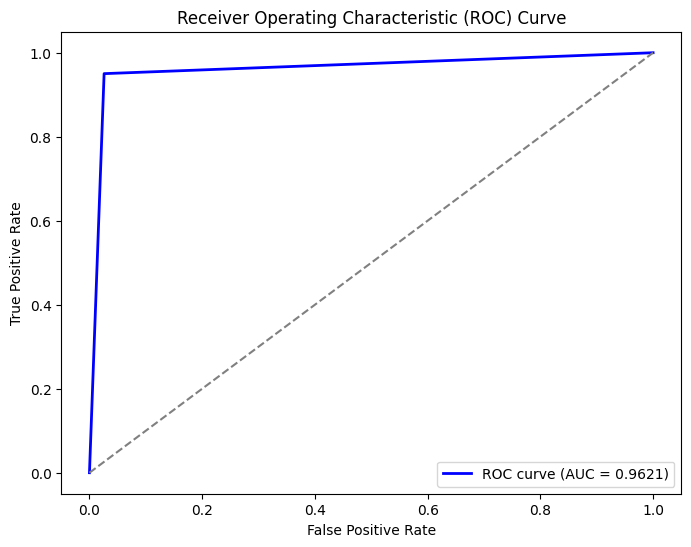

In [ ]:
# Train the Decision Tree Classifier
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1] #ROC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Compute false positive rate and true positive rate
roc_auc_value = auc(fpr, tpr)  # Compute AUC value

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()